#Statistics

###Number of friends

In [1]:
num_friends = [100,49,40,39,36,31,30,30,30,30,29,25,25,23,21,18,16,15,12,10,10,10,10,9,8,5,3,2]

* We can easily get this data, but how do we describe it?

In [2]:
from collections import Counter

In [3]:
friend_counts = Counter(num_friends)

In [4]:
xs = range(101)

In [5]:
ys = [friend_counts[x] for x in xs]

In [6]:
from matplotlib import pyplot as plt

In [7]:
%matplotlib inline

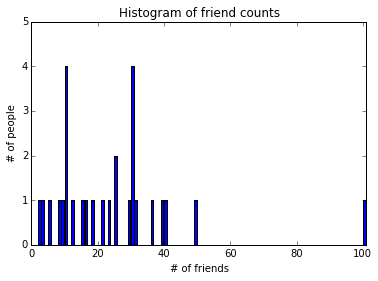

In [8]:
plt.bar(xs, ys)
plt.axis([0,101,0,5])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")

* Perhaps we want the number of friends

In [9]:
num_points = len(num_friends)

In [10]:
largest_value = max(num_friends)

In [11]:
smallest_value = min(num_friends)

In [12]:
sorted_values = sorted(num_friends)

In [13]:
smallest_value = sorted_values[0]

In [14]:
second_smallest_value = sorted_values[1]

In [15]:
second_largest_value = sorted_values[-2]

###Central Tendencies

In [17]:
def mean(x):
    return sum(x)/len(x)

In [18]:
mean(num_friends)

23.785714285714285

In [23]:
def median(v):
    """finds the middle most value"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2 #// is floored division
    
    if n % 2 == 1: #if odd
        return sorted_v[midpoint]
    
    else: #if even return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    

In [24]:
median(num_friends)

22.0

* A generalization of the median is the *quantile*. It is the value less than which a certain percentile of the data lies

In [25]:
def quantile(x,p):
    """returns the pth percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [26]:
quantile(num_friends, .10)

5

In [27]:
quantile(num_friends, .5) #this is very close to the median, just think percentiles

23

* We also of course have the mode, which is the most occuring value/s

In [34]:
def mode(x):
    """returns a list, may be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, counts in counts.items()
           if counts == max_count]

In [35]:
mode(num_friends)

[10, 30]

###Dispersion

* Dispersion refers to how spread out data is

* The range is the simplest measure of how spread out the data can be

In [41]:
def data_range(x):
    return max(x) - min(x)

In [42]:
data_range(num_friends)

98

* A more complex measure of dispersion is the **Variance**

In [54]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

* We need some of our linear algebra functions for this

In [47]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v,w))

In [48]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n """
    return dot(v, v)

In [49]:
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n - 1)

In [50]:
variance(num_friends)

375.21164021164026

* From this we can make the **Standard Deviation**

In [51]:
import math

In [52]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [53]:
standard_deviation(num_friends)

19.370380487012646

* A robust alternative of this computes the difference between the 75th percentile value and the 25th percentile value

In [55]:
def interquartile_range(x):
    return quantile(x, 0.75) -  quantile(x, 0.25)

In [56]:
interquartile_range(num_friends)

20

###Correlation

So you want to find how two things correlate and you have gotten a list of daily minutes that corresponds to the index of user and you want to see if the are related to the number of friends

In [57]:
daily_minutes = [100,60,37,39,36,31,30,37,30,30,29,25,88,23,21,18,55,15,12,10,30,10,10,9,8,5,3,2]

* One way of doing this is to look at **CoVariance**, which measures how two variables in tandem vary from their means

In [59]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y))/(n - 1)

In [60]:
covariance(num_friends, daily_minutes)

366.6693121693122

* So when corresponding elements are both above or below their means a positive number enters the mix, if one is abot and one is below, then a negative number enters the sum

* A large positive covariance means that x tends to be large when y is large and x tends to be small when y is small, a large negative covariance means the opposite, a covariance near zero means no such relationships exist

* This method has a couple problems: 
    * It is difficult to tell what is meant be large, if I increase the values in one of the sets the covariance goes up, but that doesnt really reflect the data
    * It's units are the product of the inputs units, which can get vary confusing

* For this reason it's more common to look at **Correlation** which divides out the standard deviation of both sets

In [61]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [62]:
correlation(num_friends, daily_minutes)

0.8012885641369815

* The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation)

* If we were to examine our data we would see that there are a couple of serious outliers, such as the guy with 25 friends spending 88 minutes, lets see what happens when he is excluded

In [68]:
outlier = num_friends.index(25)

In [66]:
print(outlier)

10


In [70]:
num_friends_good = [x
                    for i,x in enumerate(num_friends)
                    if i != outlier]

In [71]:
daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [72]:
correlation(num_friends_good, daily_minutes_good)

0.802097584333349

* It only went up slightly but with bigger outliers it would be a better example

* You definitely want to investigate outliers before removing them

###Simpson's Paradox

* This is when **confounding** variables are ignored.
    * A confounding variable is a dimension that is directly affecting the data you are looking into
    * You must *know your data*, and consider all possible confounding variables
    * ie your data says east coast data scientists have more friends, however when you filter further by degree you realize it is just the opposite for people with phd's 

###Other Problems

* Just because the data doesn't have a linear relationship, it may have a different relationship

* Correlation tells you nothing about how large the relationship is, they may be perfectly correlated, but in a miniscule way

* And of course the classic, "Correlation is not Causation", but its always something to consider that there may be an extra factor causing all of it. 